In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import yaml
import json
import numpy as np 
import utils.utils as utils
import re  

TO-DO:

- [x] Add line break/second x-axis with hourly wage 
* CI, mean, median for national average curve 
* Multiple beneficiary profiles
    * Define examples
    * Create yaml file for each 
    * Run applyBenefitsCalculator.R for each 
    * Create same plot 
* "Top 5" jobs
    * Identify from jobs database
    * Create/assign income growth pattern to each (won't be localized)
    * Calculate income/net resources for each of these 
    * Separate from the axis itself somehow? Like plot them separately and connect the points. Or just display the same ten breaks as labels on the axis and don't display the "custom" values   
* Identify which counties are similar to New Castle 

---

### Curve 0: Single income/benefits cliff curve 

#### 0A: New Castle County, Default Beneficiary Profile 

Recreate the following curve for a single beneficiary profile: 


![ben-cliff-graph](img/ben_cliff_reference_graph.png)

To keep it super simple and ensure we can verify the math, we'll start with just one county (New Castle, DE)

Ben Profile: `TEST.yaml` 

*with income increments changed*

NetResources is the curve we want to look at, versus a horizontal line of zero 

In [2]:
# Net Resources: (income+income.gift+income.investment
                # +income.child_support+value.employerhealthcare+total.transfers
                # +value.assistance.other-value.tuition.net) 
                # - (total.taxes-total.expenses-studentLoanRepayment-value.loans)

In [2]:
## Create the yaml file with the income growth intervals 
print('TEST.yml Beneficiary Profile')
with open(os.path.join('projects', 'TEST.yml'), 'r') as file: 
    test_config = yaml.full_load(file)

changes_dict = {'income_start':27560, 
 'income_end':100000,
 'income_increase_by':1000, 
 'locations':['New Castle County, DE']}

new_castle_config = utils.create_ben_profile_dict(**changes_dict) 

## Save the new config to projects 
project_name = 'New_Castle_TEST'
utils.save_config(new_castle_config, project_name=project_name)

## Print summary 
# utils.print_ben_sum(new_castle_config)

TEST.yml Beneficiary Profile
Saved to projects/New_Castle_TEST.yaml
Project name: New_Castle_TEST



* Run the R Script (open RStudio)
* Read output                               


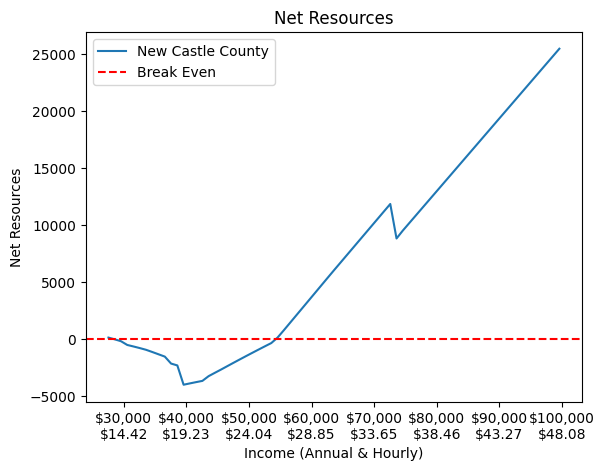

In [3]:
df = utils.read_output('New_Castle_TEST')
df.T.dropna()

## plot curve
y = df['NetResources']
x = df['income']
label_curve = 'New Castle County'
utils.plot_ben_cliff(x,y,label_curve)


#### 0B: National Average 

In [4]:
changes_dict = {'income_start':27560, 
 'income_end':100000,
 'income_increase_by':1000, 
 'locations':['all']}

project_name = 'national_avg'

nat_avg_config = utils.create_ben_profile_dict(**changes_dict) 
utils.save_config(nat_avg_config, project_name=project_name)

df_nat_avg = utils.read_output(project_name)

display(df_nat_avg)

df_nat_avg.T.dropna()

Saved to projects/national_avg.yaml
Project name: national_avg


,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2546,0,2546,2000,385,0,0,23448.0,-5028.0
1,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2386,0,2386,2000,368,0,0,24221.0,-4840.0
2,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2226,0,2226,2000,383,0,0,24995.0,-4733.0
3,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2066,0,2066,2000,374,0,0,25768.0,-4546.0
4,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,1907,0,1907,2000,406,0,0,26542.0,-4432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341489,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77251.0,31490.6
341490,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77954.0,32193.6
341491,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,78658.0,32897.6
341492,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,79361.0,33600.6


,0,1,2,3,4,5,6,7,8,9,...,341484,341485,341486,341487,341488,341489,341490,341491,341492,341493
ruleYear,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
stateFIPS,1,1,1,1,1,1,1,1,1,1,...,56,56,56,56,56,56,56,56,56,56
stateName,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
stateAbbrev,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
countyortownName,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,...,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County
famsize,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
numadults,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
numkids,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
agePerson1,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
agePerson2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


,income,mean,median,95%_mean_CI_dist,95%_mean_CI_lower,95%_mean_CI_upper
0,27560,1720.53,2036.0,73.21,1647.32,1793.74
1,28560,1732.81,2047.0,72.03,1660.78,1804.84
2,29560,1765.22,2105.0,71.15,1694.07,1836.37
3,30560,1722.21,2086.0,70.53,1651.68,1792.74
4,31560,1741.42,2135.6,70.48,1670.94,1811.90
...,...,...,...,...,...,...
68,95560,32277.86,33709.6,184.32,32093.54,32462.18
69,96560,32933.70,34372.6,184.87,32748.83,33118.57
70,97560,33591.37,35011.0,185.40,33405.97,33776.77
71,98560,34249.12,35642.0,185.82,34063.30,34434.94


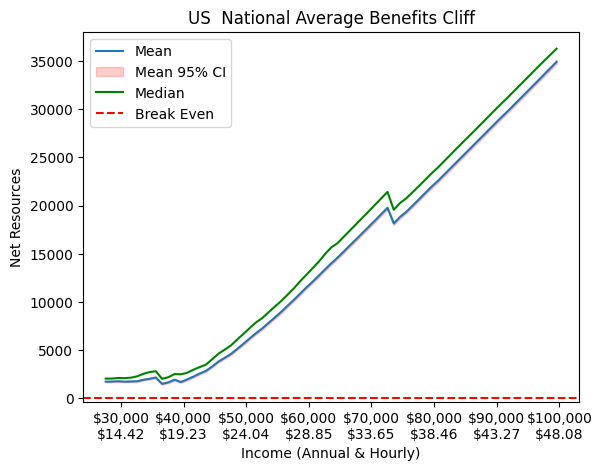

In [5]:
## National net resources by income level
# Mean, median, CI 
data = df_nat_avg.groupby(['income'])['NetResources'].agg(['mean','median']).round(2)
ci = df_nat_avg.groupby(['income'])['NetResources'].sem().mul(1.96).round(2).reset_index().rename({'NetResources':'95%_mean_CI_dist'}, axis=1)# Add CI
data = data.merge(ci, how='left', on='income')
data['95%_mean_CI_lower'] = data['mean'] - data['95%_mean_CI_dist']
data['95%_mean_CI_upper'] = data['mean'] + data['95%_mean_CI_dist']
# data['95%_mean_CI'] = data[['mean','95%_mean_CI_dist']].apply(lambda row: tuple((np.round(row['mean']-row['95%_mean_CI_dist'],2), np.round(row['mean']+row['95%_mean_CI_dist'],2))), axis=1)

display(data)

# Plot
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()


# Plot mean
plt.plot(data['income'], data['mean'], linestyle='-', label='Mean')
plt.fill_between(data['income'], (data['95%_mean_CI_lower']).values, (data['95%_mean_CI_upper']).values, color='r', alpha=0.2, label='Mean 95% CI')

# Plot median
plt.plot(data['income'], data['median'], linestyle='-', label='Median', color='g')


## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend

## Add custom ticks and labels 
ticks, labels = utils.create_custom_ticks_labels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels)


## Set axis labels and title
ax.set_xlabel('Income (Annual & Hourly)')
ax.set_ylabel('Net Resources')
ax.set_title('US  National Average Benefits Cliff')

## Legend 
plt.legend()

plt.show()

In [8]:
data_zoomed

,income,mean,median,95%_mean_CI_dist,95%_mean_CI_lower,95%_mean_CI_upper
0,27560,1720.53,2036.00,73.21,1647.32,1793.74
1,28560,1732.81,2047.00,72.03,1660.78,1804.84
2,29560,1765.22,2105.00,71.15,1694.07,1836.37
3,30560,1722.21,2086.00,70.53,1651.68,1792.74
4,31560,1741.42,2135.60,70.48,1670.94,1811.90
5,32560,1762.50,2272.00,70.77,1691.73,1833.27
6,33560,1913.98,2532.00,72.42,1841.56,1986.40
7,34560,2016.75,2714.00,74.38,1942.37,2091.13
8,35560,2153.85,2807.00,77.04,2076.81,2230.89
9,36560,1488.37,2017.60,83.12,1405.25,1571.49


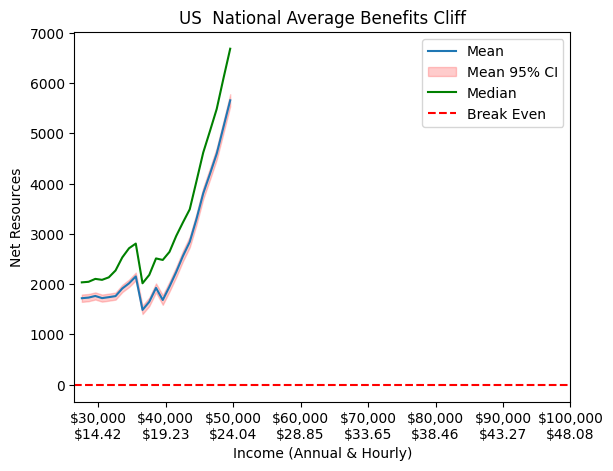

In [11]:
data_zoomed = data[data['income'] < 50000]
data_zoomed
x = data_zoomed.index
y = data_zoomed.values 

fig, ax = plt.subplots()

# Plot mean
plt.plot(data_zoomed['income'], data_zoomed['mean'], linestyle='-', label='Mean')
plt.fill_between(data_zoomed['income'], (data_zoomed['95%_mean_CI_lower']).values, (data_zoomed['95%_mean_CI_upper']).values, color='r', alpha=0.2, label='Mean 95% CI')

# Plot median
plt.plot(data_zoomed['income'], data_zoomed['median'], linestyle='-', label='Median', color='g')


## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend

## Add custom ticks and labels 
ticks, labels = utils.create_custom_ticks_labels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

## Set axis labels and title
ax.set_xlabel('Income (Annual & Hourly)')
ax.set_ylabel('Net Resources')
ax.set_title('US  National Average Benefits Cliff')


## Legend 
plt.legend()

plt.show()

### All Delaware Counties 

In [78]:
df_nat_avg

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2546,0,2546,2000,385,0,0,23448.0,-5028.0
1,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2386,0,2386,2000,368,0,0,24221.0,-4840.0
2,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2226,0,2226,2000,383,0,0,24995.0,-4733.0
3,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2066,0,2066,2000,374,0,0,25768.0,-4546.0
4,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,1907,0,1907,2000,406,0,0,26542.0,-4432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341489,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77251.0,31490.6
341490,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77954.0,32193.6
341491,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,78658.0,32897.6
341492,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,79361.0,33600.6


Kent County
New Castle County
Sussex County


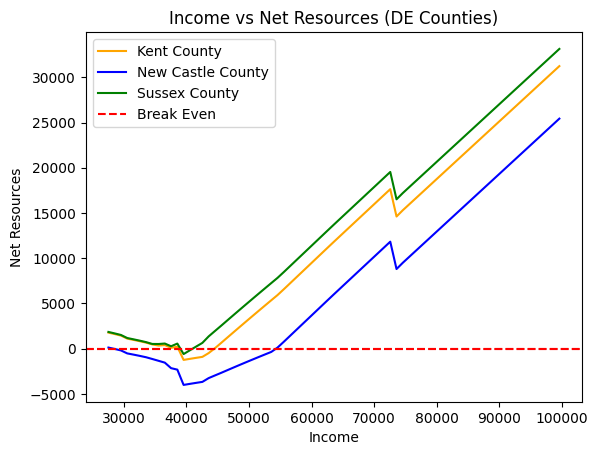

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
34967,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2546,509,3055,2000,835,0,0,23627.0,1766.6
34968,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2386,477,2863,2000,827,0,0,24397.0,1607.6
34969,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2226,445,2671,2000,816,0,0,25165.0,1437.6
34970,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2066,413,2479,2000,825,0,0,25933.0,1104.6
34971,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,1907,381,2288,2000,852,0,0,26701.0,964.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72131.0,30587.6
35182,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72768.0,31224.6
35183,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,73406.0,31862.6
35184,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,74043.0,32499.6


In [14]:
loc_test = df_nat_avg[df_nat_avg['countyortownName'].isin(['New Castle County', 'Kent County', 'Sussex County']) & (df_nat_avg['stateName'] == 'Delaware')]
loc_test

grouped_data = loc_test.groupby(['countyortownName','income'])['NetResources'].mean().round(2).reset_index(['income']) 
# not actually taking the mean, there's only one value per county and income bracket

grouped_data

color_map = {
    'New Castle County': 'blue',
    'Kent County': 'orange',
    'Sussex County': 'green'
}


# Create figure and subplots

for label in grouped_data.index.unique():
    print(label)
    data = grouped_data[grouped_data.index == label]
    plt.plot(data['income'], data['NetResources'], label=label, color=color_map[label])
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')


plt.xlabel('Income')
plt.ylabel('Net Resources')
plt.title('Income vs Net Resources (DE Counties)')
plt.legend()

# plt.grid(True)

plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

plt.show()

display(loc_test)

In [97]:
df_de_summary = pd.pivot(grouped_data.reset_index().rename({'income':'annual_income'}, axis=1), index='countyortownName', columns='annual_income', values='NetResources')
df_de_summary.iloc[:,list(range(0,len(df_de_summary.columns),10))]

annual_income,27560,37560,47560,57560,67560,77560,87560,97560
countyortownName,,,,,,,,
Kent County,1766.6,87.0,1827.6,7877.6,14400.6,17211.6,23586.6,29961.6
New Castle County,115.6,-2161.0,-2083.4,2069.6,8592.6,11403.6,17778.6,24153.6
Sussex County,1843.6,260.0,3728.6,9778.6,16301.6,19112.6,25487.6,31862.6


---


### "Top 5" Jobs 

Demo of what the job plotting could look like. 

We don't yet have access to the localized jobs data with income growth projections.

OEWS looks like it gives state/metro area level info and the formulas from this pdf are what the FRB dashboard uses to both 

1.) Localize to county level

2.) Project into the future 

https://npowerpa.sharepoint.com/sites/DataInnovationLab/Shared%20Documents/Forms/AllItems.aspx?ga=1&id=%2Fsites%2FDataInnovationLab%2FShared%20Documents%2FProjects%2Fproj%5Fbenefits%5Fcliffs%2FShared%20from%20FRB%2FPDFs%2FBLS%5FEstimating%5FOccupation%5Fand%5FLocation%5FSpecific%5FWages%5Fover%5Fthe%5FLife%5FCycle%2Epdf&viewid=67435686%2Dec6f%2D4f99%2Db230%2Dcba53f299cb1&parent=%2Fsites%2FDataInnovationLab%2FShared%20Documents%2FProjects%2Fproj%5Fbenefits%5Fcliffs%2FShared%20from%20FRB%2FPDFs

#### For Delaware 
 

In [37]:
# https://www.mynextmove.org/profile/wages/15-1299.05?zip=19711 - info sec engineer
# https://www.mynextmove.org/profile/wages/29-1292.00?zip=19711 - dental hygienist 
# https://www.mynextmove.org/profile/wages/15-1254.00?zip=19711 - web developer 
# https://www.mynextmove.org/profile/wages/29-1171.00?st=DE - nurse practitioner
# https://www.mynextmove.org/profile/wages/29-1141.00?zip=19711 - registered nurse 

In [38]:
base_url = "https://www.mynextmove.org/profile/"
# wages/15-1299.05?zip=19711 - info sec engineer
# wages/29-1292.00?zip=19711 - dental hygienist 
# wages/15-1254.00?zip=19711 - web developer 
# wages/29-1171.00?st=DE - nurse practitioner
# wages/29-1141.00?zip=19711 - registered nurse 

In [12]:
job_dict = {
    '1299.05':'InfoSec Engineer',
    '1292.00':'Dental Hygienist', 
    '1254.00':'Web Developer',
    '1171.00':'Nurse Practitioner', 
    '1141.00':'Registered Nurse'   
}

job_data_fps = [os.path.join('example_jobs',f) for f in os.listdir('example_jobs')]
dataframes = []
for fp in job_data_fps: 
    df = pd.read_csv(fp)
    job_code = re.search('[0-9]+\.[0-9]+',fp).group(0)
    job_title = job_dict[job_code]
    df['Job Title'] = job_title
    print(job_title, fp)
    dataframes.append(df)

df = pd.concat(dataframes)
cols = df.filter(regex='Annual|Hourly').columns
de_jobs_df = df[df['Location'] == 'Delaware'].drop(['Location'], axis=1).set_index('Job Title')
de_jobs_df = de_jobs_df.apply(lambda row: pd.Series([float(re.sub('\$|,','',x)) for x in row.values]) , axis=1)
de_jobs_df.columns = cols

display("Delaware Jobs Data")
de_jobs_df

Dental Hygienist example_jobs/LocalSalary_29-1292.00_DE.csv
Nurse Practitioner example_jobs/LocalSalary_29-1171.00_DE.csv
Web Developer example_jobs/LocalSalary_15-1254.00_DE.csv
InfoSec Engineer example_jobs/LocalSalary_15-1299.05_DE (1).csv
Registered Nurse example_jobs/LocalSalary_29-1141.00_DE.csv


'Delaware Jobs Data'

,Annual Low (10%),Annual QL (25%),Annual Median (50%),Annual QU (75%),Annual High (90%),Hourly Low (10%),Hourly QL (25%),Hourly Median (50%),Hourly QU (75%),Hourly High (90%)
Job Title,,,,,,,,,,
Dental Hygienist,77690.0,81350.0,84070.0,97620.0,103400.0,37.35,39.11,40.42,46.93,49.71
Nurse Practitioner,99160.0,104360.0,122530.0,133060.0,156040.0,47.68,50.17,58.91,63.97,75.02
Web Developer,73110.0,86900.0,97240.0,107150.0,140860.0,35.15,41.78,46.75,51.51,67.72
InfoSec Engineer,62500.0,87340.0,114340.0,142590.0,170060.0,30.05,41.99,54.97,68.55,81.76
Registered Nurse,64100.0,78370.0,82230.0,97990.0,101110.0,30.82,37.68,39.54,47.11,48.61


In [ ]:
## For each income progression
# Create a new yaml for the same beneficiary profile, changing the income progression 
    # Problem: the income progression for these jobs aren't constant as it's set in the yaml 
    # YAML is also at county level. For this income prototype should I do the average of the counties to get Delaware?  

Kent County
New Castle County
Sussex County


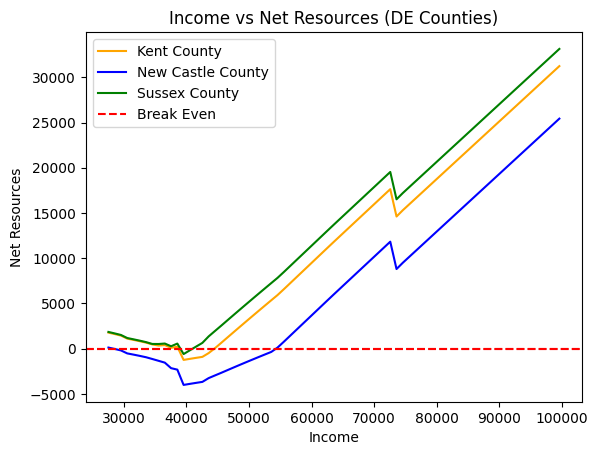

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
34967,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2546,509,3055,2000,835,0,0,23627.0,1766.6
34968,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2386,477,2863,2000,827,0,0,24397.0,1607.6
34969,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2226,445,2671,2000,816,0,0,25165.0,1437.6
34970,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2066,413,2479,2000,825,0,0,25933.0,1104.6
34971,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,1907,381,2288,2000,852,0,0,26701.0,964.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72131.0,30587.6
35182,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72768.0,31224.6
35183,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,73406.0,31862.6
35184,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,74043.0,32499.6


In [15]:
loc_test = df_nat_avg[df_nat_avg['countyortownName'].isin(['New Castle County', 'Kent County', 'Sussex County']) & (df_nat_avg['stateName'] == 'Delaware')]
loc_test

grouped_data = loc_test.groupby(['countyortownName','income'])['NetResources'].mean().round(2).reset_index(['income']) 
# not actually taking the mean, there's only one value per county and income bracket

grouped_data

color_map = {
    'New Castle County': 'blue',
    'Kent County': 'orange',
    'Sussex County': 'green'
}


# Create figure and subplots

for label in grouped_data.index.unique():
    print(label)
    data = grouped_data[grouped_data.index == label]
    plt.plot(data['income'], data['NetResources'], label=label, color=color_map[label])
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')


plt.xlabel('Income')
plt.ylabel('Net Resources')
plt.title('Income vs Net Resources (DE Counties)')
plt.legend()

# plt.grid(True)

plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

plt.show()

display(loc_test)